Computational modeling in Python, SoSe22 

# Expressing and visualizing symbolic functions on a numeric grid

Given are the following functions:

\begin{align}
    f_1(x) &= x\left(x-3\right)\left(x+3\right) \\
    f_2(x) &= \left| x \right| \\
    f_3(x) &= \sin \left(2.1x\right)\left(-\frac{x}{2}\right) \\
    f_4(x) &= 1.6^x -1.5x \\
    f_5(x,y) &= \sin\left(x+y\right)\tan\left(0.1x\right) \\
    f_6(x,y) &= \sin\left(\sqrt{5}+x\right)y \\
\end{align}

\- courtesy of Anna Bardroff \- 


# Task 1

Define numeric functions for $f_1$ to $f_6$ and plot the 1D functions $f_1$ to $f_4$ using labels, axes formatting etc. to make the plots look nice.


# Solution 1

Implementation of the functions (using numpy <code>abs</code>, <code>sin</code>, <code>tan</code>, and <code>sqrt</code>). With the functions one can use vectorization if $x$ and $y$ are numpy arrays. 

In [73]:
from numpy import *

def function1(x):
    return x*(x-3)*(x+3)

def function2(x):
    return abs(x)
    
def function3(x):
    return -sin(2.1*x)*x/2

def function4(x):
    return 1.5**x - 1.5*x
    
def function5(x,y):
    return sin(x+y)*tan(0.1*x)

def function6(x,y):
    return sin(sqrt(5.0) + x)*y
    

Plotting in the interval $x \in [-3,3]$ 

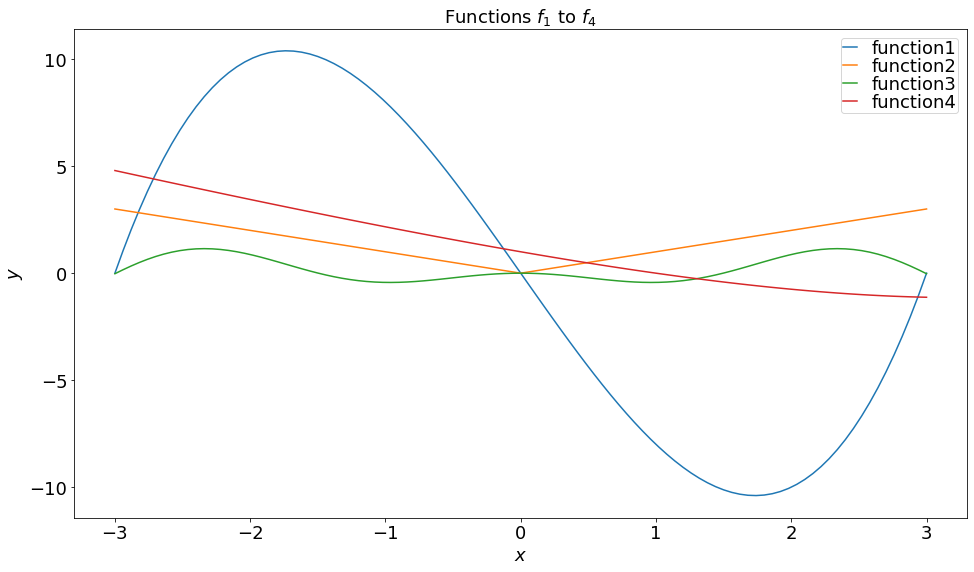

In [74]:
import matplotlib.pyplot as plt


x = linspace(-3,3,101)

mf=18 # font size

# create a figure and axis object
fig, ax = plt.subplots(figsize=(16,9))

# plot the data
ax.plot(x,function1(x),marker=None,label='function1')
ax.plot(x,function2(x),marker=None,label='function2')
ax.plot(x,function3(x),marker=None,label='function3')
ax.plot(x,function4(x),marker=None,label='function4')

# set some properties of the axis ticks
ax.xaxis.set_tick_params(labelsize=mf)
ax.yaxis.set_tick_params(labelsize=mf)
ax.set_xlabel(r'$x$',fontsize=mf)
ax.set_ylabel(r'$y$',fontsize=mf)
plt.title(r'Functions $f_1$ to $f_4$',fontsize=mf)

# add a legend
legend = ax.legend(loc='best', shadow=False,fontsize=mf,borderpad = 0.1, labelspacing = 0, handlelength = 0.8)

# display the plot
plt.show()

# Task 2

Plot $f_5$ and $f_6$ using surface plots and contour plots.

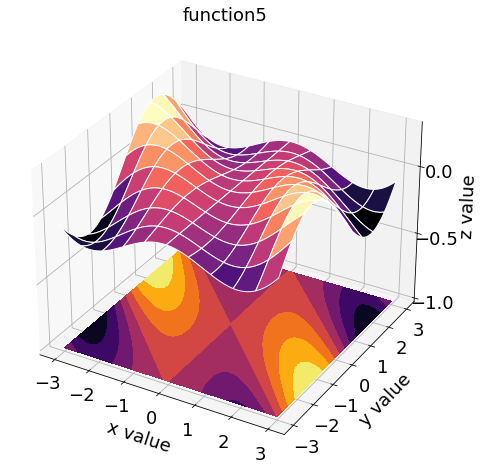

In [79]:
# need additional modules
from matplotlib import cm  # color map

lbpad = 10 # label pad 


# set up the grids
x = linspace(-3,3,51)
y = linspace(-3,3,51)

X, Y = meshgrid(x,y)


# surface and contour plots combined
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.set_title('function5',fontsize=mf)

# be a bit experimental with the color map, strides and edge color
ax.plot_surface(X, Y, function5(X,Y),cmap = cm.magma, rstride=5, cstride=5,edgecolor='white')

# alpha gives the opacity of the visual object
# offset signifies at which z value to plot the contour
# zdir='z' project onto z-axis at given offset, try zdir='x' to see what it does

ax.contourf(X, Y, function5(X,Y), zdir='z', offset=-1, cmap='inferno',alpha=1.)
plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)



for t in ax.zaxis.get_major_ticks(): 
    t.label.set_fontsize(mf)
    
# labelpad: move label away from axis
ax.set_xlabel('x value',fontsize=mf, labelpad=lbpad)
ax.set_ylabel('y value',fontsize=mf, labelpad=lbpad)
ax.set_zlabel('z value',fontsize=mf, labelpad=lbpad) 

# change the range of the z-axis
ax.set_zlim(-1,.3)

# change the number of ticks on z-axis
ax.zaxis.set_major_locator(plt.MaxNLocator(3))

plt.show()

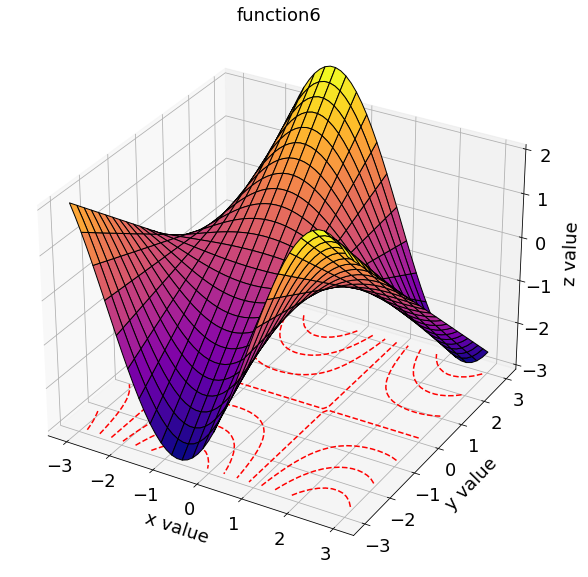

In [92]:
# need additional modules
from matplotlib import cm  # color map

# set up the grids
x = linspace(-3,3,51)
y = linspace(-3,3,51)

X, Y = meshgrid(x,y)


# surface and contour plots combined
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.set_title('function6',fontsize=mf)

# be a bit experimental with the color map, strides and edge color
ax.plot_surface(X, Y, function6(X,Y),cmap = cm.plasma,rstride=2, cstride=2,edgecolor='black')

# alpha gives the opacity of the visual object
# offset signifies at which z value to plot the contour
# zdir='z' project onto z-axis at given offset, try zdir='x' to see what it does

# using contour instead of contourf and no color map but a single color
ax.contour(X, Y, function6(X,Y), zdir='z', offset=-3,colors="red",alpha=1, linestyles='dashed')
plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)



for t in ax.zaxis.get_major_ticks(): 
    t.label.set_fontsize(mf)

# labelpad: move label away from axis
ax.set_xlabel('x value',fontsize=mf, labelpad=lbpad)
ax.set_ylabel('y value',fontsize=mf, labelpad=lbpad)
ax.set_zlabel('z value',fontsize=mf, labelpad=lbpad) 

# change the range of the z-axis
ax.set_zlim(-3,2)

# change the number of ticks on z-axis
ax.zaxis.set_major_locator(plt.MaxNLocator(5))

plt.show()

# Making a Movie

Matplotlib has a very nice animator feature that lets you visualize time-dependent data as a movie. The animator function <code>FuncAnimation</code> needs as input a matplotlib figure object and an update function that returns things to plot for each frame. In this case it is a matplotlib line object. 

To save a movie in .mp4 format we need to install an additional package with conda: Open the command promt (Windows users: use the Anaconda navigator to open powershell) and activate your conda environment: <pre>conda activate</pre> 
and install 'ffmpeg'
<pre>conda install ffmpeg</pre> 


# Task 3

Animate the function $f(x,t) = \cos(x+\omega t)$ for $\omega = 1$ in the intervals $x,t \in [0,2\pi]$. 

# Solution 3

In [71]:
from matplotlib.animation import FuncAnimation
from numpy.random import random
from IPython.display import HTML 

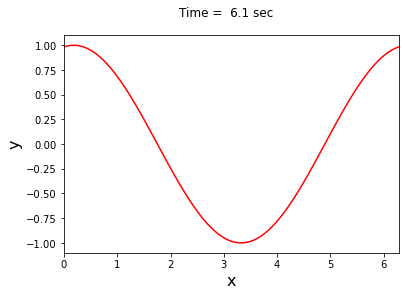

In [72]:
mf = 16 # font size

# create an empty figure object and add a subplot
fig = plt.figure() # smaller is faster
ax = fig.add_subplot()

# set some boundaries
xmin = 0
xmax = 2*pi
ymin = -1.1
ymax = 1.1

omega = 1.0

# set up xdata and calculate cos(x+omega*t) for t=0

xdata = linspace(0,xmax, 101)
ydata = cos(xdata)

# create  line object at t=0
line, = ax.plot(xdata, ydata, 'r-')


# this function is called ones in the begining
# it can be used to set a number of things for the frames.
# each frame is just a regular plot from matplotlib,
# the plots are then put together into a movie
def initFrame():
    # axis
    ax.set_xlabel(r'x', fontsize=mf)
    ax.set_ylabel(r'y', fontsize=mf)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    
    return line, # return a sequence (extra komma) 
    
    

# we need a function that calculates the next frame
# it gets as argument the frame number and any number of 
# additional arguments one needs. See call to FuncAnimation
def updateFrame(nframe,xdata):
        
    deltaT = 0.1 # 100 ms
        
    # we may want to give the current time in the title
    itime = nframe*deltaT 
    plt.suptitle("Time = " + '{:4.1f}'.format(itime)+' sec')
        
    # update linedata for the current time
    ydata = cos(xdata + omega*itime)
            
    line.set_data(xdata, ydata)
    return line,  # return a sequence (extra comma) 
    
   
# note: we can use line breaks in function calls
animation = FuncAnimation(fig, init_func=initFrame, frames=int(2*pi*10),  # 10 frames per second 
                        interval=100, repeat=False,blit=True,
                        func=updateFrame, fargs=tuple([xdata,]))  
# ------------------------------------------------------^ additional arguments of updateFrame

# blit: fast graphics operations: only re-draw changed parts of the frame 

# we can save to file
# (this will take a a few seconds to render)
#animation.save('random_walker.mp4', fps=10, dpi=150, writer='ffmpeg')

# or embed the animation into the notebook
# (this will take a a few seconds to render)
#HTML(animation.to_html5_video())

# and even add control elements using Javascript widgets 
# (this will take a a few seconds to render)
HTML(animation.to_jshtml())

